<a href="https://colab.research.google.com/github/patriciadorneles/data.science/blob/main/Analisando_os_Dados_do_Airbnb_Nova_York_ipynb_(finalizado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Nova York*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Nova York, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Nova York" width="50%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/View_of_Empire_State_Building_from_Rockefeller_Center_New_York_City_dllu_%28cropped%29.jpg/432px-View_of_Empire_State_Building_from_Rockefeller_Center_New_York_City_dllu_%28cropped%29.jpg"></center>


## Obtenção dos Dados


Todos os dados usados nesse projeto foram obtidos através do site [Inside Airbnb](https://http://insideairbnb.com/get-the-data/)

Para esta análise exploratória, usarei apenas seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in New York (good for visualisations).*


Importante: O portal está em constante evolução, e em determinado momento, pode ser que o conjunto de dados exato utilizado nesse notebook não esteja mais disponível, o que quebraria o código.


Com isso em mente, vamos ao projeto.

In [15]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/listings.csv")

<ipython-input-4-9b3f0baff2d1>:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/listings.csv")


## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.


In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Dando sequência, vamos identificar os atributos, a quantidade de entradas e os tipos de coluna, além de verificar as 5 primeiras entradas do *dataset*.

Este *dataset* que baixamos é a versão "resumida" do Airbnb.

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
df.head()

Entradas:	 42931
Variáveis:	 18



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Quanto menos valores ausentes, maior é a qualidade do *dataset*. Por isso, essa análise deve ser feita logo no início do projeto.

* É possível ver que a coluna `license` possui quase 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 24% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.999977
reviews_per_month                 0.240013
last_review                       0.240013
name                              0.000280
host_name                         0.000116
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar e analisar a distribuição das variáveis, vamos usar plotar um histograma - frequentemente usado em estatísticas e análise de dados.

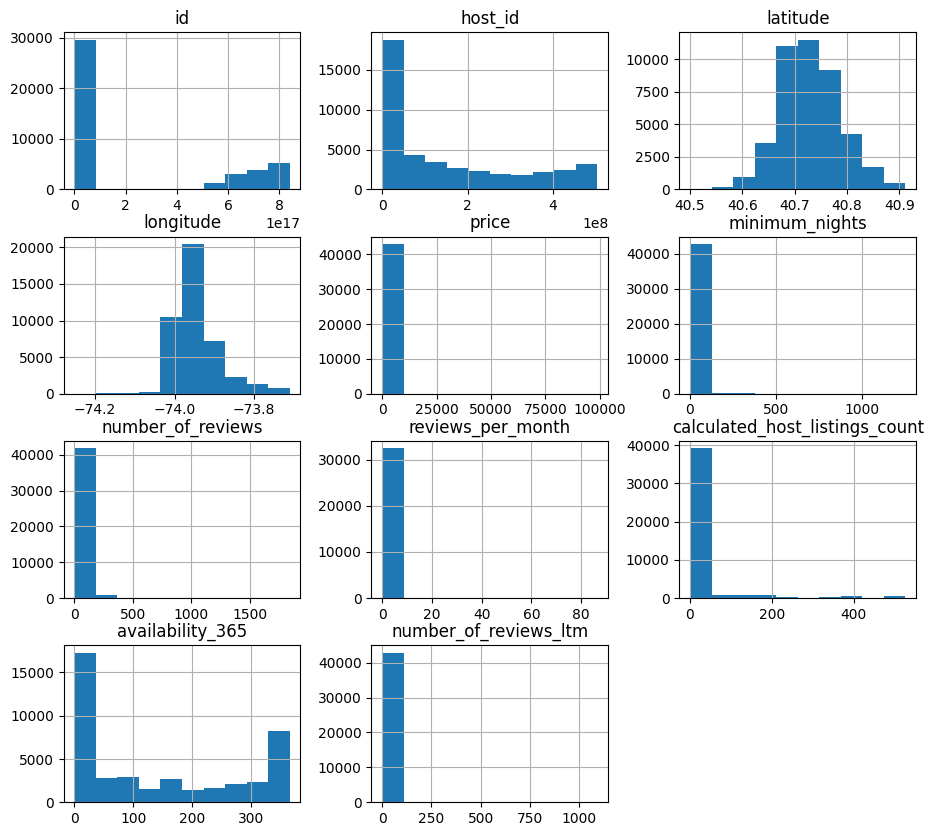

In [31]:
# plotar o histograma das variáveis numéricas
df.hist(bins=10, figsize=(11,10));


### **Q4. Qual a média dos preços de aluguel?**

In [11]:
# ver a média da coluna `price``
media_price = df['price'].mean()
print("Média de preço", media_price)

Média de preço 200.30716731499382


A média de preço fica em U$200,30, com base nas 42.931 entradas do *dataset*.

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers* - valores atípicos. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [12]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,42931.000000,42931.000000,42931.000000,32627.000000,42931.000000,42931.000000
mean,200.307167,18.111178,25.856001,1.168988,24.054809,140.262211
std,895.082911,27.462513,56.616344,1.789675,80.867958,142.001486
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,75.000000,2.000000,1.000000,0.140000,1.000000,0.000000
50%,125.000000,7.000000,5.000000,0.520000,1.000000,89.000000
75%,200.000000,30.000000,24.000000,1.670000,4.000000,289.000000
max,99000.000000,1250.000000,1842.000000,86.610000,526.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 200, porém seu valor máximo é 99000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

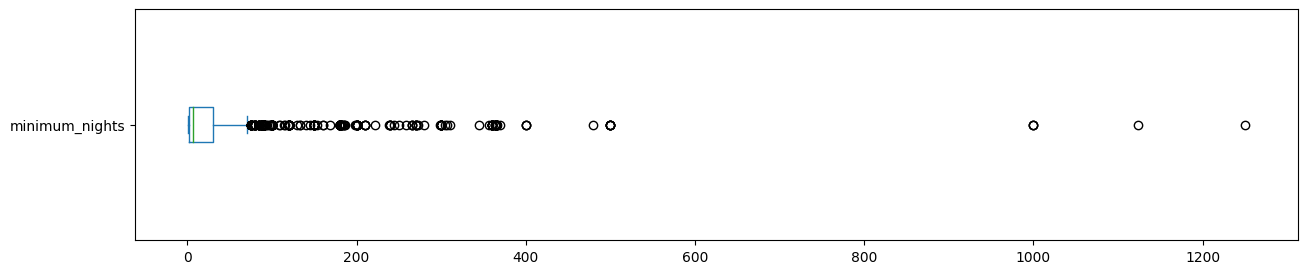

minimum_nights: valores acima de 30:
1890 entradas
4.4024%


In [19]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

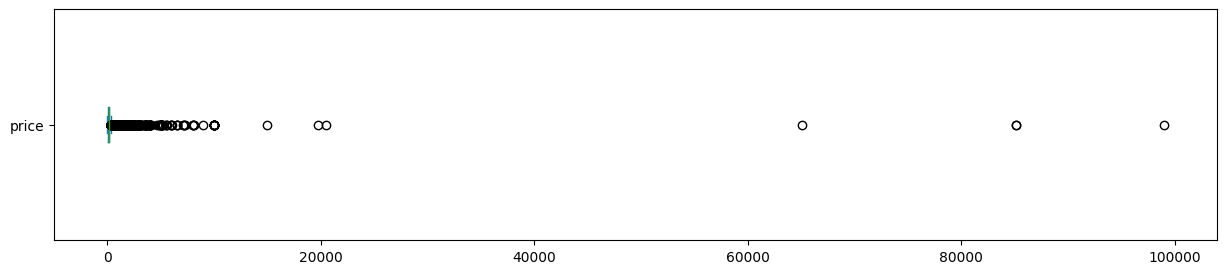


price: valores acima de 1500
294 entradas
0.6848%


In [20]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma, tendo uma visão mais clara dos nossos dados.

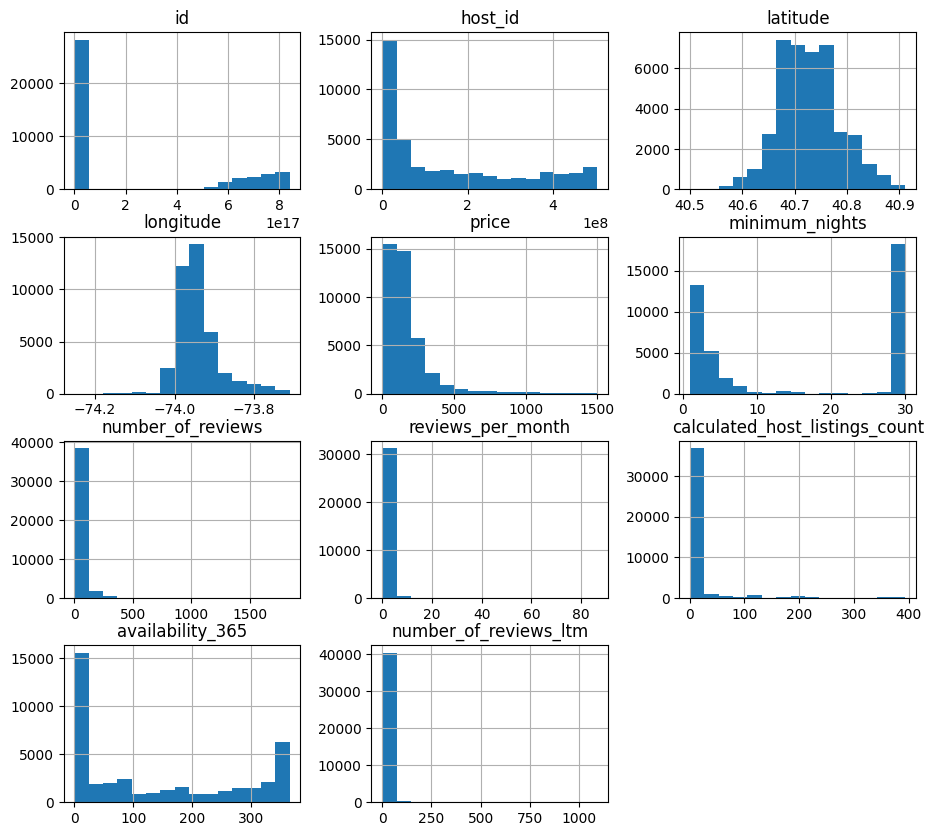

In [32]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(11,10));

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

É possível medir essa relação, e o coeficiente de correlação ajuda a entender o quanto ela é forte. Para descobrir as conexões entre as variáveis que nos interessam, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [22]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.155748,-0.046186,0.013466,0.095174,0.092408
minimum_nights,-0.155748,1.000000,-0.225785,-0.420857,0.091226,-0.224767
number_of_reviews,-0.046186,-0.225785,1.000000,0.577829,-0.101802,0.053615
reviews_per_month,0.013466,-0.420857,0.577829,1.000000,-0.066120,0.193916
calculated_host_listings_count,0.095174,0.091226,-0.101802,-0.066120,1.000000,0.110021
availability_365,0.092408,-0.224767,0.053615,0.193916,0.110021,1.000000


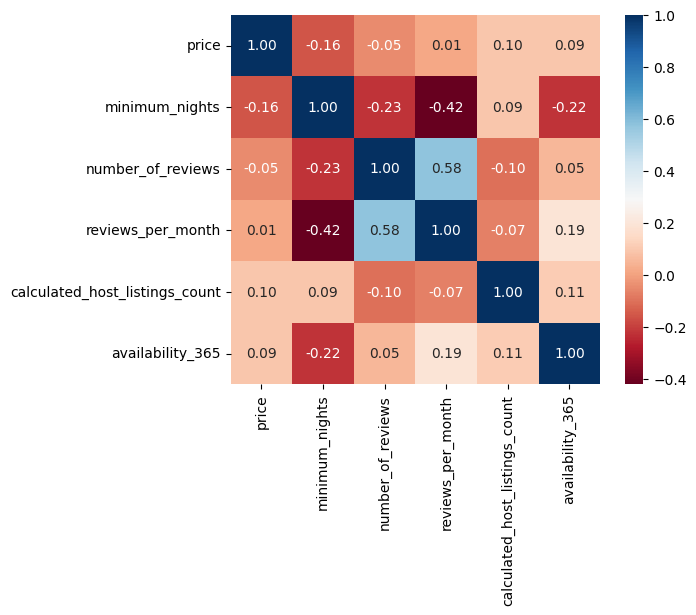

In [23]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Ao examinar as correlações entre as variáveis, notamos que não há correlações fortes entre as variáveis numéricas analisadas, como preço, número de reviews e disponibilidade. Isso sugere que os preços não estão diretamente relacionados com a quantidade de reviews ou a disponibilidade ao longo do ano.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [24]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    22817
Private room       17198
Shared room          556
Hotel room           194
Name: room_type, dtype: int64

In [25]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.559720
Private room       0.421882
Shared room        0.013639
Hotel room         0.004759
Name: room_type, dtype: float64

A análise revelou que os tipos mais comuns de imóveis no Airbnb de Nova York são:

- Apartamento/Casa inteira (55.97%)
- Quarto Privado (42.19%)
- Quarto Compartilhado (1.36%)
- Quarto de Hotel (0.48%)

Isso indica que a maioria dos viajantes prefere alugar a propriedade completa ou um quarto privado.

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [26]:
# ver preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Fort Wadsworth       800.000000
Tribeca              484.610390
SoHo                 362.507353
Theater District     360.652174
Midtown              337.170539
Willowbrook          329.000000
Belle Harbor         300.500000
NoHo                 296.484848
Neponsit             295.000000
Flatiron District    282.764706
Name: price, dtype: float64

Ao analisar os preços por bairro, observamos que as localidades mais caras para aluguel em Nova York incluem:


1.   Fort Wadsworth
2.   Tribeca
3.   SoHo
4.   Theater District
5.   Midtown




Tribeca e SoHo, por exemplo, possuem médias de preço significativamente mais altas em comparação com outros bairros.

<center><img alt="Analisando Airbnb" width="60%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Fort_Wadsworth_01.jpg/450px-Fort_Wadsworth_01.jpg"></center>

<div align="center">
  <h1>Fort Wadsworth  - Nova York</h1>






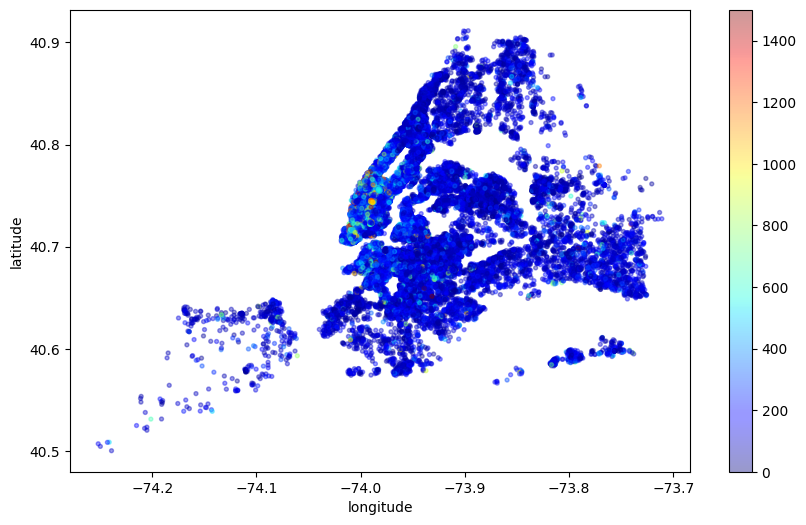

In [33]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(10,6));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [29]:
# ver a média da coluna `minimum_nights``

minimum_nights = df['minimum_nights'].mean()
print("Média do mínimo de noites:", minimum_nights)


Média do mínimo de noites: 18.111178402552934


## Conclusões


A análise exploratória dos dados do Airbnb em Nova York revelou insights interessantes sobre o mercado de aluguel de propriedades na cidade.

Identificamos os tipos mais populares de imóveis, as localidades mais caras e a falta de correlações fortes entre as variáveis numéricas. Essas informações são valiosas tanto para viajantes em busca de acomodações quanto para anfitriões que desejam entender melhor o mercado e estabelecer preços competitivos.

A análise de dados do Airbnb não apenas oferece insights para viajantes e anfitriões individuais, mas também contribui para a compreensão mais ampla das tendências do mercado de hospedagem alternativa. Com o aumento da demanda por experiências personalizadas, a análise de dados desempenha um papel fundamental na tomada de decisões informadas e na criação de estratégias eficazes para todos os envolvidos nesse ecossistema dinâmico.